In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Data
df = pd.read_csv('StudentPerformanceFactors.csv')

# Preprocessing of data
# Drop missing values to ensure accurate plotting
df_clean = df.dropna()

# Set the visual style for the plots
sns.set_style("whitegrid")

In [ ]:
# kontrollera att datan har lästs in korrekt, se fem första raderna 
df_clean.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# statistisk sammanfattning av alla faktorer
df_clean.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


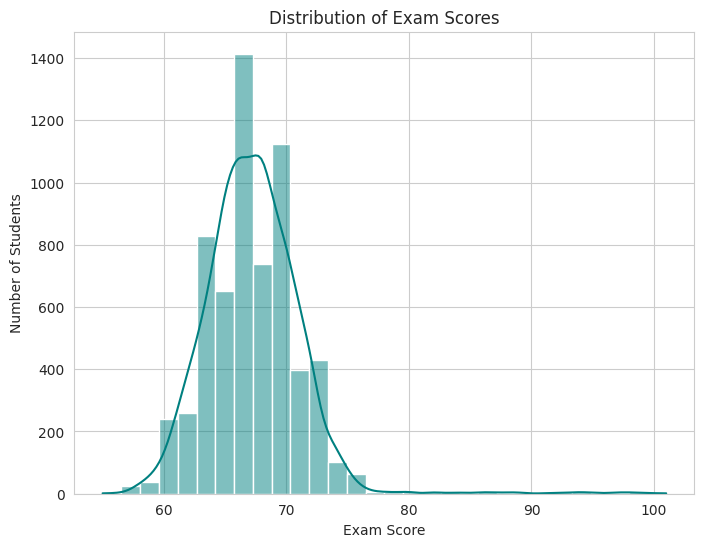

In [ ]:
# 1. Distribution of Exam Scores 
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Exam_Score'], kde=True, bins=30, color='teal')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.show()

Histogrammet med KDE‑kurva visar hur student prestation i Exam poäng fördelar sig.
Majoriteten av studenter ligger nära medelområdet, ungefär mellan 65 och 75 poäng.

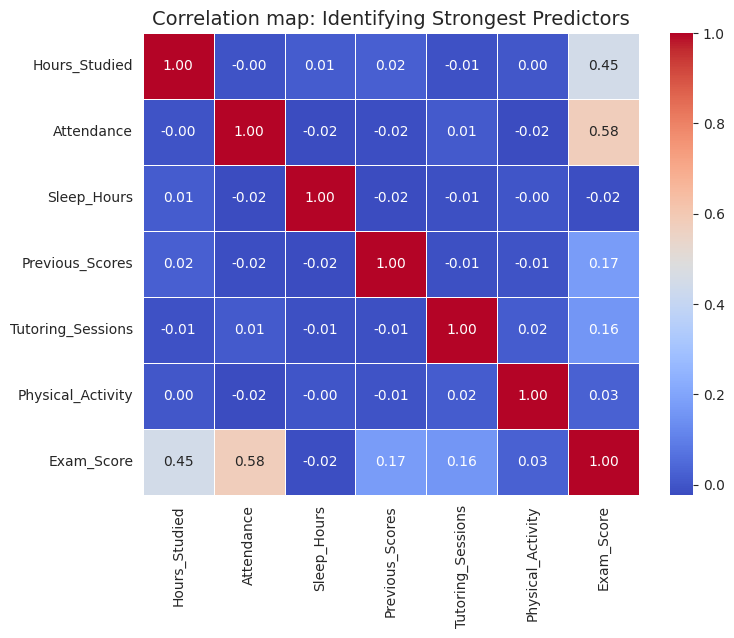

In [ ]:
# 2. IDENTIFYING STRONGEST PREDICTORS
plt.figure(figsize=(8, 6))
numerical_cols = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation map: Identifying Strongest Predictors', fontsize=14)
plt.show()

Korrelationsmatrisens map ger en översiktlig bild av hur de givna variablerna hänger ihop.
Exam_Score representerar prestation och visar tydliga positiva samband med Attendance(Närvarande) och Hours_Studied(Studietid), vilket antyder att närvaro och studietid starkt påverkar resultaten.
Previous_Scores(Historiska prestation) korrelerar också högt med Exam_Score, vilket tyder på att tidigare prestationer är en god indikator på framtida betyg.

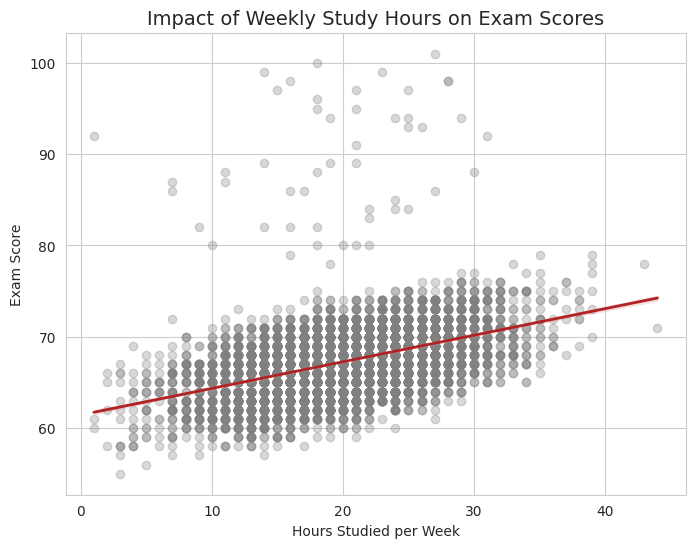

In [ ]:
# 3. STUDY TIME VS. PERFORMANCE
plt.figure(figsize=(8, 6))
sns.regplot(data=df_clean, x='Hours_Studied', y='Exam_Score', 
            scatter_kws={'alpha':0.3, 'color':'gray'}, 
            line_kws={'color':'firebrick', 'lw':2})
plt.title('Impact of Weekly Study Hours on Exam Scores', fontsize=14)
plt.xlabel('Hours Studied per Week')
plt.ylabel('Exam Score')
plt.show()

Studietid jämfört med betyg.
Regressionsdiagrammet visar positiv trend och det finns ett tydligt samband där gruppen som studerar 18–22,5 timmar per vecka (den största gruppen) generellt sett uppnår högre poäng än de som studerar under 10 timmar. Data antyder att de största förbättringarna sker fram till ca 25 timmars studier. Att datapunkterna ligger nära linjen tyder på att sambandet är stabilt; större spridning skulle indikera att kvaliteten på studierna och andra faktorer (som närvaro) blir viktigare än bara antalet timmar.


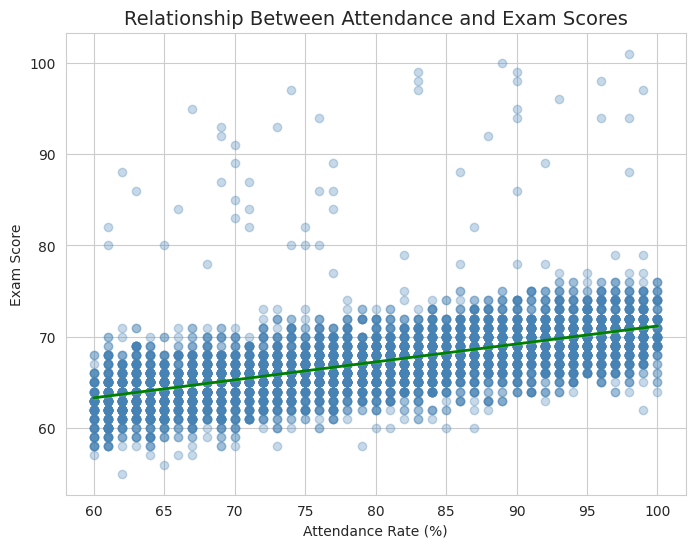

In [ ]:
# 4. ATTENDANCE VS. STUDY PERFORMANCE
plt.figure(figsize=(8, 6))
sns.regplot(data=df_clean, x='Attendance', y='Exam_Score', 
            scatter_kws={'alpha':0.3, 'color':'steelblue'}, 
            line_kws={'color':'green', 'lw':2})
plt.title('Relationship Between Attendance and Exam Scores', fontsize=14)
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Exam Score')
plt.show()

Regressionsdiagrammet visar stark samband dår hög närvaro är den tydligaste indikatorn på höga provresultat.De studenter med under 70 % närvaro uppnår sällan toppresultat.
De studenter som har högst betyg (95–100 poäng) har nästan utan undantag en närvaro på över 96 %, oavsett om de studerar måttligt eller mycket hemma.

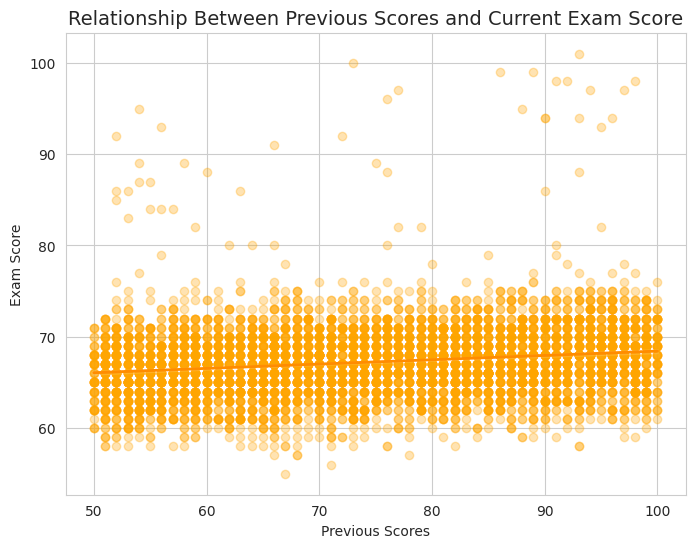

In [ ]:
# 5. RELATIONSHIP BETWEEN PREVIOUS SCORES AND CURRENT PERFORMANCE
plt.figure(figsize=(8, 6))
sns.regplot(data=df_clean, x='Previous_Scores', y='Exam_Score', 
            scatter_kws={'alpha':0.3, 'color':'orange'}, 
            line_kws={'color':'darkorange', 'lw':2})
plt.title('Relationship Between Previous Scores and Current Exam Score', fontsize=14)
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.show()

En av stödjande faktorer för prestation som visar positiv samband mellan tidigare prestation och actual prestation. Normallt sett de som historiskt sett studerar bra med stor sannolikhet ska fortsätta så. 

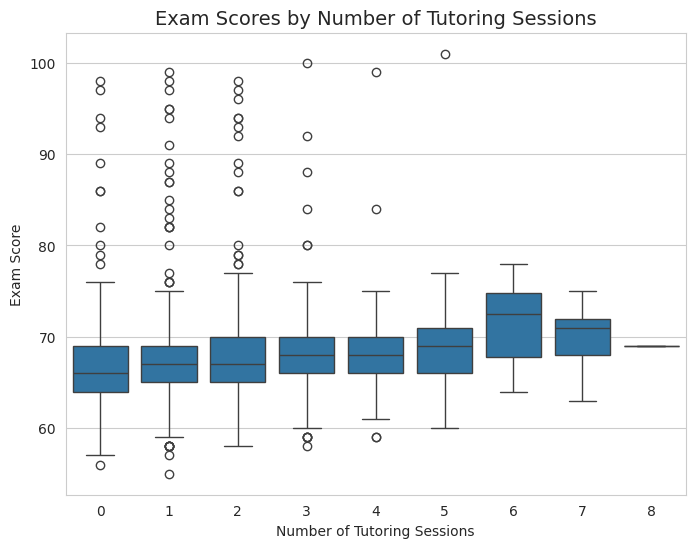

In [ ]:
# 6. IMPACT OF TUTORING SESSIONS ON EXAM SCORES
plt.figure(figsize=(8, 6))
# Using a boxplot to show the distribution across discrete session counts
sns.boxplot(data=df, x='Tutoring_Sessions', y='Exam_Score')
plt.title('Exam Scores by Number of Tutoring Sessions', fontsize=14)
plt.xlabel('Number of Tutoring Sessions')
plt.ylabel('Exam Score')
plt.show()

Handledning (Tutoring) är en av stödjande faktorer för prestation eftersom 60 % av eleverna får extra handledning, hjälper detta till att lyfta resultaten även för de som har en lägre egen studietid.

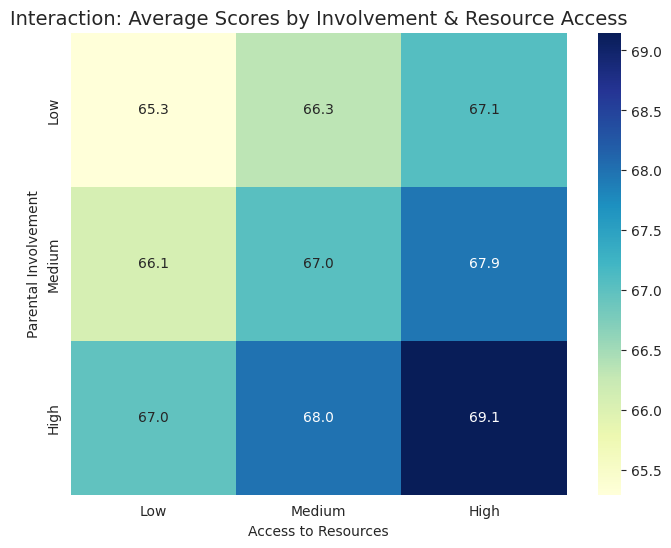

In [ ]:
#7. MULTI-FACTOR INTERACTION (Involvement + Resources)
interaction_pivot = df_clean.pivot_table(values='Exam_Score', 
                                   index='Parental_Involvement', 
                                   columns='Access_to_Resources', 
                                   aggfunc='mean').reindex(index=involvement_order, 
                                                         columns=involvement_order)
plt.figure(figsize=(8, 6))
sns.heatmap(interaction_pivot, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Interaction: Average Scores by Involvement & Resource Access', fontsize=14)
plt.xlabel('Access to Resources')
plt.ylabel('Parental Involvement')
plt.show()

Flera faktorer samverkar för att påverka studenternas akademiska resultat, och interaktionsmapen visar tydligt att effekten blir starkare när två positiva faktorer kombineras.
• 	Hög föräldrainvolvering + god tillgång till resurser ger de högsta genomsnittliga resultaten (69,1).
• 	Låg föräldrainvolvering + låg tillgång till resurser leder till de lägsta resultaten (65,3).


Slutsats
Studietid är en viktig faktor, men den verkar mest effektiv när den kombineras med hög närvaro och extra handledning. En student som studerar "lagom" mycket (ca 20 timmar) men har hög närvaro presterar ofta lika bra eller bättre än en student som studerar mer men saknar samma disciplin i skolan.
Vissa faktorer som (föräldrainvolvering) och materiellt stöd (resurser) förstärker varandra och skapar en mer gynnsam lärmiljö.